#### Importing libraries and dataset

In [1]:
#importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
os.chdir('/Users/laetitia/IronHack/data-ft-par-labs/Projects/Week-4/data')

In [3]:
# IMporting the yearly datasets

yr2015 = pd.read_csv('2015.csv')
yr2016 = pd.read_csv('2016.csv')
yr2017 = pd.read_csv('2017.csv')
yr2018 = pd.read_csv('2018.csv')
yr2019 = pd.read_csv('2019.csv')

In [4]:
# checking the information for each table matches source

print(yr2015.shape)
print(yr2016.shape)
print(yr2017.shape)
print(yr2018.shape)
print(yr2019.shape)

(158, 12)
(157, 13)
(155, 12)
(156, 9)
(156, 9)


#### Data Cleaning

In [5]:
# Investigating the columns to determine columns to be dropped 

yr2016.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')

In [6]:
# Columns are missing a timestamp, adding a year column for analysis

years = [yr2015, yr2016, yr2017, yr2018, yr2019]

for i in years:
    if i is yr2015:
        yr2015['Year'] = 2015
    elif i is yr2016:
        yr2016['Year'] = 2016
    elif i is yr2017:
        yr2017['Year'] = 2017
    elif i is yr2018:
        yr2018['Year'] = 2018
    else:
        yr2019['Year'] = 2019

In [7]:
yr2018.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Year
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393,2018
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340,2018
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408,2018
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138,2018
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357,2018


In [8]:
# Renaming columns apprepriately for concatenation

yr2017.rename(columns = {'Country':'Country', 'Happiness.Rank':'Happiness Rank',\
                         'Happiness.Score':'Happiness Score','Economy..GDP.per.Capita.':'Economy (GDP per Capita)',\
                         'Family':'Family', 'Health..Life.Expectancy.':'Health (Life Expectancy)', \
                         'Freedom':'Freedom','Generosity':'Generosity', 
                         'Trust..Government.Corruption.':'Trust (Government Corruption)'}, inplace=True)

yr2018.rename(columns={'Overall rank':'Happiness Rank', 'Country or region':'Country', 'Score':'Happiness Score',\
                       'GDP per capita':'Economy (GDP per Capita)','Social support':'Family',\
                       'Healthy life expectancy': 'Health (Life Expectancy)',\
                       'Freedom to make life choices':'Freedom',\
                       'Perceptions of corruption':'Trust (Government Corruption)'}, inplace=True)

yr2019.rename(columns= {'Overall rank':'Happiness Rank', 'Country or region':'Country', 'Score':'Happiness Score',\
                        'GDP per capita':'Economy (GDP per Capita)','Social support':'Family',\
                        'Healthy life expectancy':'Health (Life Expectancy)',\
                        'Freedom to make life choices':'Freedom',\
                        'Perceptions of corruption':'Trust (Government Corruption)'}, inplace=True)

##### Adding missing columns

In [9]:
# Concatenating the 2017, 2018, 2019 and adding the missing regions data for regions analysis

data = pd.concat([yr2017, yr2018, yr2019])
data.shape

(467, 13)

In [10]:
# Determining the various regions

yr2015['Region'].unique()

array(['Western Europe', 'North America', 'Australia and New Zealand',
       'Middle East and Northern Africa', 'Latin America and Caribbean',
       'Southeastern Asia', 'Central and Eastern Europe', 'Eastern Asia',
       'Sub-Saharan Africa', 'Southern Asia'], dtype=object)

In [11]:
# Defining lists for the various countris and their regions

west_eu = ['Switzerland', 'Iceland','Denmark', 'Norway', 'Finland', 'Netherlands', 'Sweden', 'Austria',\
           'Luxembourg', 'Ireland', 'Belgium', 'United Kingdom', 'Germany', 'France', 'Spain', 'Malta',\
           'Italy', 'North Cyprus', 'Cyprus', 'Portugal', 'Greece']

north_am = ['Canada', 'United States']

autra_nzea = ['New Zealand', 'Australia']

mideast_nafrica = ['Israel', 'United Arab Emirates', 'Oman', 'Qatar', 'Saudi Arabia', 'Kuwait',\
                   'Bahrain', 'Libya', 'Algeria', 'Turkey', 'Jordan', 'Morocco', 'Lebanon',\
                   'Tunisia', 'Palestinian Territories', 'Iran', 'Iraq', 'Egypt', 'Yemen', 'Syria']

latin_am_carri = ['Costa Rica', 'Mexico', 'Brazil', 'Venezuela', 'Panama', 'Chile', 'Argentina',\
                  'Uruguay', 'Columbia', 'Suriname', 'Trinidad and Tobago', 'El Salvador', 'Guatemala'\
                  'Ecuador', 'Bolivia', 'Paraguay', 'Nicaragua', 'Peru', 'Jamaica', 'Dominican Republic'\
                  'Honduras', 'Haiti']

southe_asia = ['Singapore','Thailand','Malaysia','Indonesia','Vietnam','Philippines','Laos','Myanmar','Cambodia']

cent_east_eu = ['Czech Republic','Uzbekistan','Slovakia','Moldova','Kazakhstan','Slovenia','Lithuania'\
                'Belarus','Poland','Croatia','Russia','Kosovo','Turkmenistan','Estonia','Kyrgyzstan'\
                'Azerbaijan','Montenegro','Albania','Bosnia and Herzegovina','Hungary','Tajikistan'\
                'Ukraine','Armenia','Georgia','Bulgaria']

eastern_asia = ['Taiwan','Japan','South Korea','Hong Kong','China','Mongolia']

sub_sah_africa = ['Mauritius','Nigeria','Zambia','Somaliland region','Mozambique','Lesotho','Swaziland',\
                  'South Africa','Ghana','Zimbabwe','Liberia','Sudan','Congo (Kinshasa)','Ethiopia','Sierra Leone',\
                  'Mauritania','Kenya','Djibouti','Botswana','Malawi','Cameroon','Angola','Mali','Congo (Brazzaville)'\
                  'Comoros','Uganda','Senegal','Gabon','Niger','Tanzania','Madagascar','Central African Republic',\
                  'Chad','Guinea','Ivory Coast','Burkina Faso','Rwanda','Benin','Burundi','Togo', 'South Sudan']

southern_asia = ['Bhutan','Pakistan','Bangladesh','India','Nepal','Sri Lanka','Afghanistan']

In [12]:
# Defining a function to create and fill out regions columns based on country value 

def set_region(country):
    if country in west_eu:
        return 'Western Europe'
    elif country in north_am:
        return 'North America'
    elif country in autra_nzea:
        return 'Australia and New Zealand'
    elif country in mideast_nafrica:
        return 'Middle East and Northern Africa'
    elif country in latin_am_carri:
        return 'Latin America and Caribbean'
    elif country in southe_asia:
        return 'Southeastern Asia'
    elif country in cent_east_eu:
        return 'Central and Eastern Europe'
    elif country in eastern_asia:
        return 'Eastern Asia'
    elif country in sub_sah_africa:
        return 'Sub-Saharan Africa'
    else:
        return 'Southern Asia'

    
# Creating regions columns and filling accordingly

data['Region'] = data['Country'].apply(lambda x: set_region(x))

In [13]:
data.shape

(467, 14)

In [14]:
# concatening all three dataframes

df = pd.concat([yr2015, yr2016, data])
df.shape

(782, 18)

In [15]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year,Lower Confidence Interval,Upper Confidence Interval,Whisker.high,Whisker.low,Dystopia.Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015,NaN,NaN,NaN,NaN,NaN
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015,NaN,NaN,NaN,NaN,NaN
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015,NaN,NaN,NaN,NaN,NaN
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015,NaN,NaN,NaN,NaN,NaN
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015,NaN,NaN,NaN,NaN,NaN


In [16]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual', 'Year', 'Lower Confidence Interval',
       'Upper Confidence Interval', 'Whisker.high', 'Whisker.low',
       'Dystopia.Residual'],
      dtype='object')

##### Dropping columns not needed

In [17]:
df = df.drop(['Standard Error','Dystopia Residual','Lower Confidence Interval','Upper Confidence Interval', 'Whisker.high', 'Whisker.low',\
             'Dystopia.Residual'], axis=1)
df.head()

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year
0,Switzerland,Western Europe,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,Iceland,Western Europe,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015
2,Denmark,Western Europe,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
3,Norway,Western Europe,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015
4,Canada,North America,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015


In [18]:
df.shape

(782, 11)

In [19]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Year'],
      dtype='object')

In [20]:
# Reorganizing the columns

df = df[['Year','Country', 'Region', 'Happiness Rank', 'Happiness Score','Economy (GDP per Capita)',\
        'Family', 'Health (Life Expectancy)','Freedom', 'Trust (Government Corruption)', 'Generosity']]
df.head(3)

,Year,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,2015,Switzerland,Western Europe,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,2015,Iceland,Western Europe,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,2015,Denmark,Western Europe,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139


In [21]:
# Checking the geenral information of the produced dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 782 entries, 0 to 155
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Year                           782 non-null    int64  
 1   Country                        782 non-null    object 
 2   Region                         782 non-null    object 
 3   Happiness Rank                 782 non-null    int64  
 4   Happiness Score                782 non-null    float64
 5   Economy (GDP per Capita)       782 non-null    float64
 6   Family                         782 non-null    float64
 7   Health (Life Expectancy)       782 non-null    float64
 8   Freedom                        782 non-null    float64
 9   Trust (Government Corruption)  781 non-null    float64
 10  Generosity                     782 non-null    float64
dtypes: float64(7), int64(2), object(2)
memory usage: 73.3+ KB


In [22]:
# Formating the year correctly
# df['Year'] = pd.to_datetime(df['Year'].astype(str), format='%Y')

In [23]:
# df.info()

In [24]:
# Describing the dataframe
df.describe()

,Year,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
count,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,781.000000,782.000000
mean,2016.993606,78.698210,5.379018,0.916047,1.078392,0.612416,0.411091,0.125436,0.218576
std,1.417364,45.182384,1.127456,0.407340,0.329548,0.248309,0.152880,0.105816,0.122321
min,2015.000000,1.000000,2.693000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2016.000000,40.000000,4.509750,0.606500,0.869363,0.440183,0.309767,0.054000,0.130000
50%,2017.000000,79.000000,5.322000,0.982205,1.124735,0.647310,0.431000,0.091000,0.201982
75%,2018.000000,118.000000,6.189500,1.236187,1.327250,0.808000,0.531000,0.156030,0.278832
max,2019.000000,158.000000,7.769000,2.096000,1.644000,1.141000,0.724000,0.551910,0.838075


In [25]:
# Checking for any duplicates in the dataframe
df.duplicated().sum()

0

In [26]:
# Making a copy of the dataframe to work on
df1 = df.copy()

#### Data Analysis

##### Question 1: Observing the evolution of happiness over the years

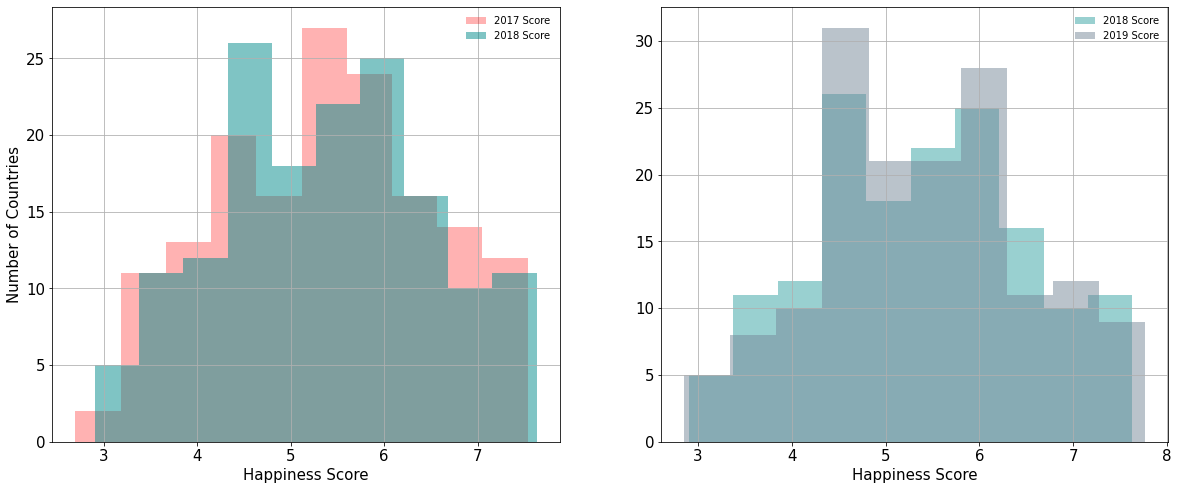

In [27]:
# Happiness evolution over 2017, 2018 and 2019

fig, axes = plt.subplots(1,2, figsize=(20,8))

axes[0].hist(df1[df1['Year'] == 2017]['Happiness Score'], bins=10, color='red', alpha=0.3, label='2017 Score')
axes[0].legend(frameon=False, prop={'size':20})
axes[0].set_xlabel('Happiness Score', fontsize=15)
axes[0].set_ylabel('Number of Countries', fontsize=15)
axes[0].tick_params(axis='x', labelsize=15)
axes[0].tick_params(axis='y', labelsize=15)

axes[0].hist(df1[df1['Year'] == 2018]['Happiness Score'],color='darkcyan',alpha=0.5, label='2018 Score')
axes[0].legend(frameon=False)
axes[0].grid()

axes[1].hist(df1[df1['Year'] == 2018]['Happiness Score'],color='darkcyan',alpha=0.4, label='2018 Score')
axes[1].legend(frameon=False)
axes[1].set_xlabel('Happiness Score', fontsize=15)
axes[1].tick_params(axis='x', labelsize=15)
axes[1].tick_params(axis='y', labelsize=15)


axes[1].hist(df1[df1['Year'] == 2019]['Happiness Score'],color='lightslategray',alpha=0.5, label='2019 Score')
axes[1].legend(frameon=False)
axes[1].grid()

plt.show()

In [28]:
# from the above, we can observe that the distribution curve for 2019 widened compared to 2018.
# There is also a significant increase in the 4.5-6.5 range in 2019 implying moderately happy countries became slightly happier
# Conclusion, 2019 was happier than 2018

##### Question 2: Determing Happiness by Region

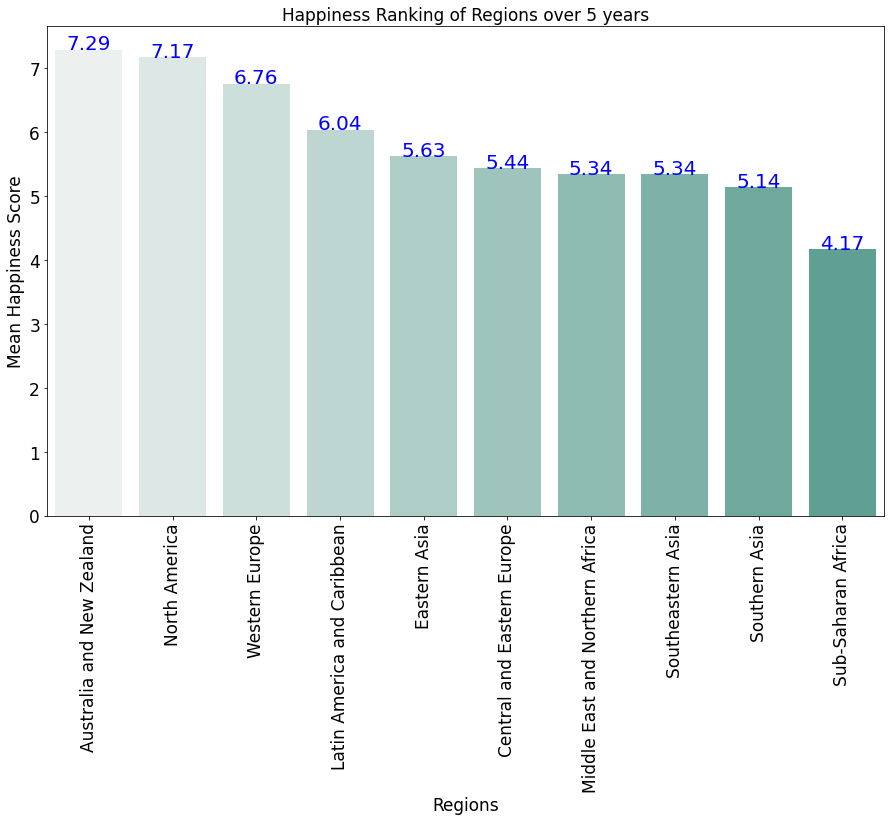

In [29]:
# Ranking happiness per the regions over 5 years (2015-2019)

fig = plt.figure(figsize=(15,9))
region_ranking = df1.groupby('Region')['Happiness Score'].agg('mean').round(2).sort_values(ascending=False)
plot1 = sns.barplot(x=region_ranking.index, y=region_ranking.values, palette="light:#5A9")
plt.xticks(rotation =90, fontsize = 17)
plt.yticks(fontsize = 17)
plt.xlabel('Regions',fontsize=17)
plt.ylabel('Mean Happiness Score', fontsize = 17)
plt.title('Happiness Ranking of Regions over 5 years', fontsize = 17)

for i in range(len(region_ranking)):
    plot1.annotate(str(region_ranking[i]), xy=(i, region_ranking[i]), fontsize = 20, color = 'blue', horizontalalignment='center')

plt.savefig('Regions_Happines_Ranking.png', dpi = 300)
plt.show()

##### Question 3: Examining the top 3 and bottom 3 contries over the years for fluctuations

In [30]:
# Ranking the regions over the 5 years from 2015 to 2019 to observe changes over the years

#Top 3
top2017 = df1[df1['Year'] == 2017].groupby(['Country'])['Happiness Score'].mean().sort_values(ascending = False).head(3)
top2018 = df1[df1['Year'] == 2018].groupby(['Country'])['Happiness Score'].mean().sort_values(ascending = False).head(3)
top2019 = df1[df1['Year'] == 2019].groupby(['Country'])['Happiness Score'].mean().sort_values(ascending = False).head(3)


# bottom3 
botm2017 = df1[df1['Year'] == 2017].groupby(['Country'])['Happiness Score'].mean().sort_values(ascending = False).tail(3)
botm2018 = df1[df1['Year'] == 2018].groupby(['Country'])['Happiness Score'].mean().sort_values(ascending = False).tail(3)
botm2019 = df1[df1['Year'] == 2019].groupby(['Country'])['Happiness Score'].mean().sort_values(ascending = False).tail(3)

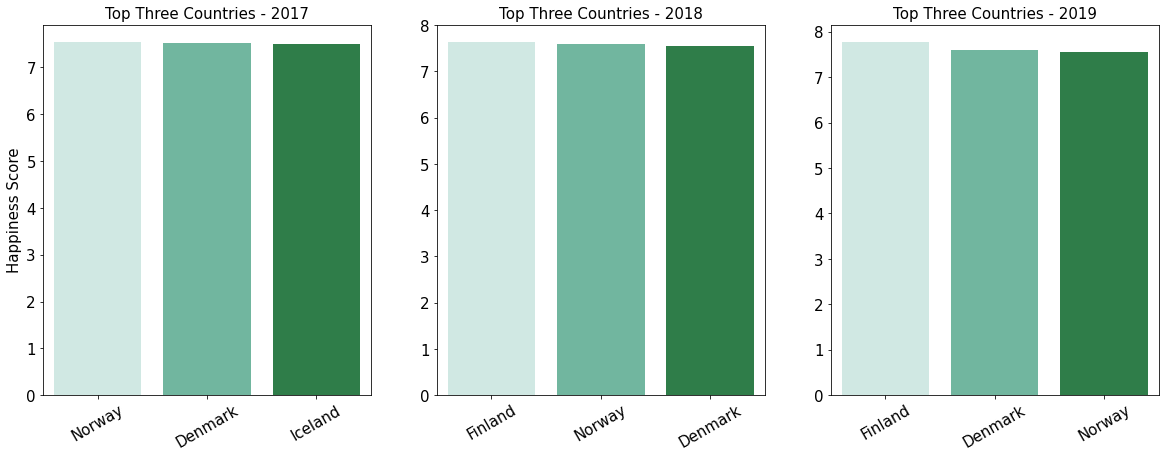

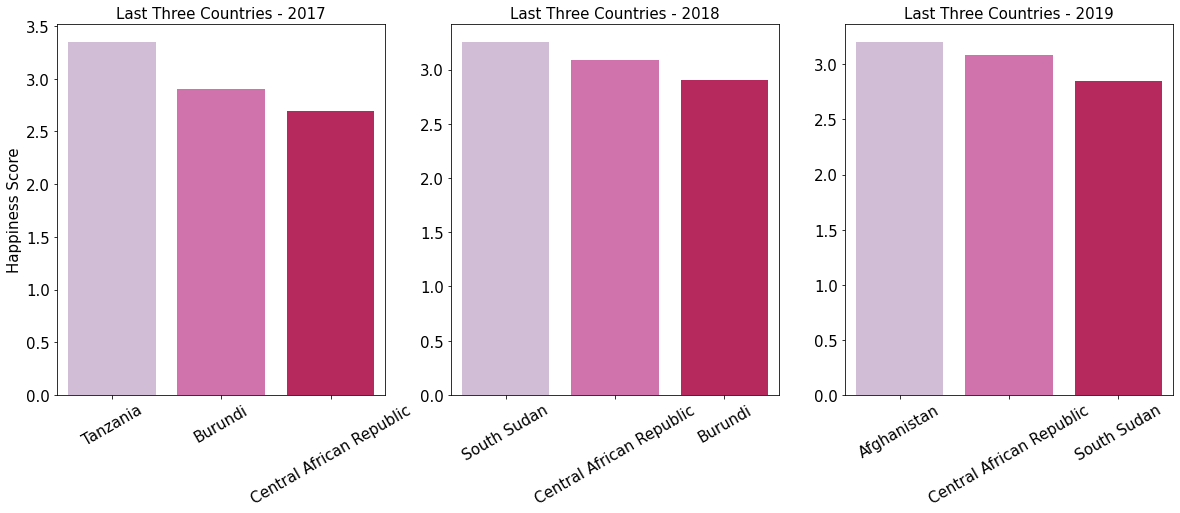

In [31]:
# Top 3 over the last 3 years
fig = plt.figure(figsize=(20, 15))
plt.subplot(2,3,1)
sns.barplot( y=top2017.values, x=top2017.index, palette='BuGn')
plt.title('Top Three Countries - 2017', fontsize=15)
plt.xticks(rotation=30, fontsize=15)
plt.xlabel(None)
plt.yticks(fontsize=15)
plt.ylabel('Happiness Score', fontsize=15)

plt.subplot(2,3,2)
sns.barplot( y=top2018.values, x=top2018.index, palette='BuGn')
plt.title('Top Three Countries - 2018', fontsize=15)
plt.xticks(rotation=30, fontsize=15)
plt.xlabel(None)
plt.yticks(fontsize=15)

plt.subplot(2,3,3)
sns.barplot( y=top2019.values, x=top2019.index, palette='BuGn')
plt.title('Top Three Countries - 2019', fontsize=15)
plt.xticks(rotation=30, fontsize=15)
plt.xlabel(None)
plt.yticks(fontsize=15)
plt.show()

# Bottom 3 over the last 3 years
fig = plt.figure(figsize=(20, 15))
plt.subplot(2,3,1)
sns.barplot( y=botm2017.values, x=botm2017.index, palette='PuRd')
plt.title('Last Three Countries - 2017', fontsize=15)
plt.xticks(rotation=30, fontsize=15)
plt.xlabel(None)
plt.ylabel('Happiness Score', fontsize=15)
plt.yticks(fontsize=15)

plt.subplot(2,3,2)
sns.barplot( y=botm2018.values, x=botm2018.index, palette='PuRd')
plt.title('Last Three Countries - 2018', fontsize=15)
plt.xticks(rotation=30, fontsize=15)
plt.xlabel(None)
plt.yticks(fontsize=15)

plt.subplot(2,3,3)
sns.barplot( y=botm2019.values, x=botm2019.index, palette='PuRd')
plt.title('Last Three Countries - 2019', fontsize=15)
plt.xticks(rotation=30, fontsize=15)
plt.xlabel(None)
plt.yticks(fontsize=15)
plt.show()

#### From the above, the following observations where made

- 1- Finland was number 1 country for 2018 and 2019 having been in the 5th and 6 positions in the previous years

- 2- South Sudan went from being in the bottm 14 to the bottom 3 and finally to the last country in 2019

- Based on the above, focusing on 2019 and the happiness variables, further analysis were made to determine what factors led to these changes

##### Comparing happiness indicators for top and bottom countries in 2019 (Finland vs South Soudan)

In [32]:
# South Sudan started appearing on the happiness ranking list in 2016 at position 143. 
# Over the years, it has jumped down the ranks

bottom = df1.loc[(df1['Country'] == 'South Sudan')].reset_index()
bottom

,index,Year,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,142,2016,South Sudan,Sub-Saharan Africa,143,3.832,0.393940,0.185190,0.157810,0.196620,0.130150,0.258990
1,146,2017,South Sudan,Sub-Saharan Africa,147,3.591,0.397249,0.601323,0.163486,0.147062,0.116794,0.285671
2,153,2018,South Sudan,Sub-Saharan Africa,154,3.254,0.337000,0.608000,0.177000,0.112000,0.106000,0.224000
3,155,2019,South Sudan,Sub-Saharan Africa,156,2.853,0.306000,0.575000,0.295000,0.010000,0.091000,0.202000


In [33]:
# Finland on the other hand started on the happiness ranking list from the start at position 6. 
# Over the years, it was maintained at position 5 and in the last 2 year, 2018, 2019 it sky rocketed to position 1

top = df1.loc[(df1['Country'] == 'Finland')].reset_index()
top

,index,Year,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,5,2015,Finland,Western Europe,6,7.406,1.290250,1.318260,0.889110,0.641690,0.413720,0.233510
1,4,2016,Finland,Western Europe,5,7.413,1.405980,1.134640,0.810910,0.571040,0.410040,0.254920
2,4,2017,Finland,Western Europe,5,7.469,1.443572,1.540247,0.809158,0.617951,0.382612,0.245483
3,0,2018,Finland,Western Europe,1,7.632,1.305000,1.592000,0.874000,0.681000,0.393000,0.202000
4,0,2019,Finland,Western Europe,1,7.769,1.340000,1.587000,0.986000,0.596000,0.393000,0.153000


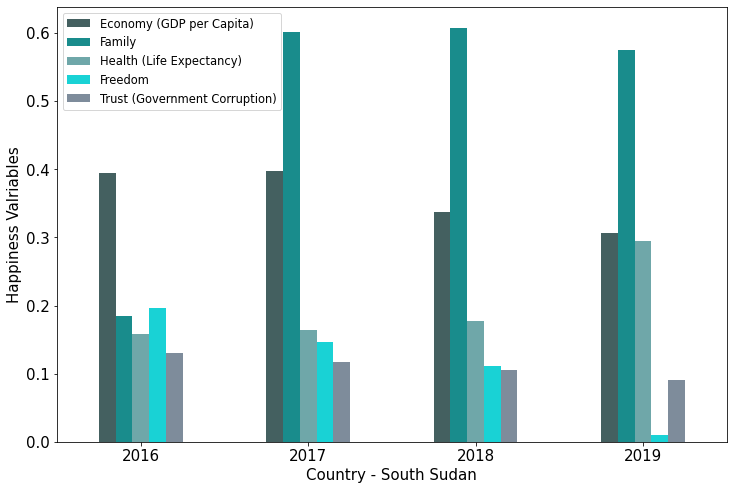

In [34]:
# Examining the happiness variables for finland and Sudan to observe fluctuations

bottom.plot('Year', [6,7,8,9,10], kind='bar',  figsize=(12,8), 
           color = ['darkslategray', 'teal', 'cadetblue', 'darkturquoise', 'slategray'], alpha=0.9)
plt.ylabel('Happiness Valriables', fontsize = 15)
plt.tick_params(axis='y', labelrotation=0, labelsize=15)
plt.tick_params(axis='x', labelrotation=0, labelsize=15)
plt.xlabel('Country - South Sudan', fontsize=15)
plt.legend(prop={'size':11.5}, loc='upper left')
plt.show()

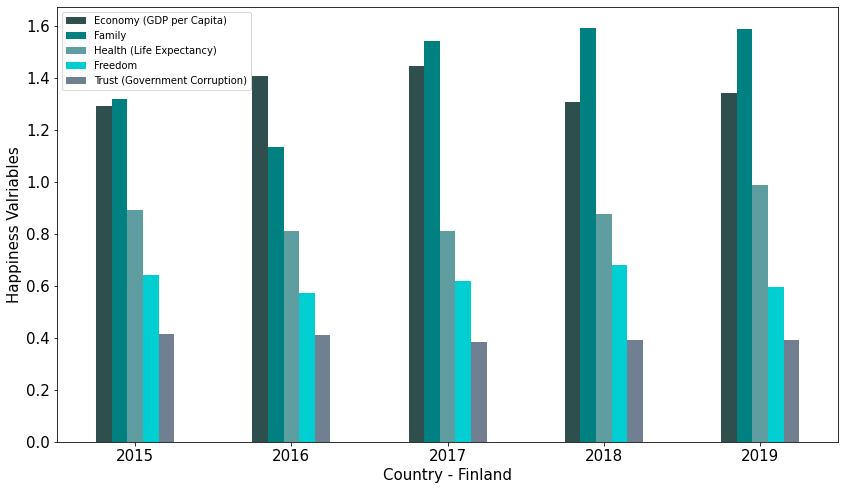

In [35]:
# Examining the happiness variables for finland and Sudan to observe fluctuations

top.plot('Year', [6,7,8,9,10], kind='bar', figsize=(14, 8), 
         color = ['darkslategray', 'teal', 'cadetblue', 'darkturquoise', 'slategray'])
plt.xlabel('Country - Finland', fontsize=15)
plt.ylabel('Happiness Valriables', fontsize = 15)
plt.tick_params(axis='x', labelrotation=0, labelsize=15)
plt.tick_params(axis='y', labelrotation=0, labelsize=15)
plt.legend(loc='upper left')
plt.show()

In [36]:
# Freedom means freedom to make life choices
# Family is social support seemed to have such an impact on Finland moving up the ranks
# Healthy life expectancy

In [37]:
# Getting correlation matrices for the happiness variables

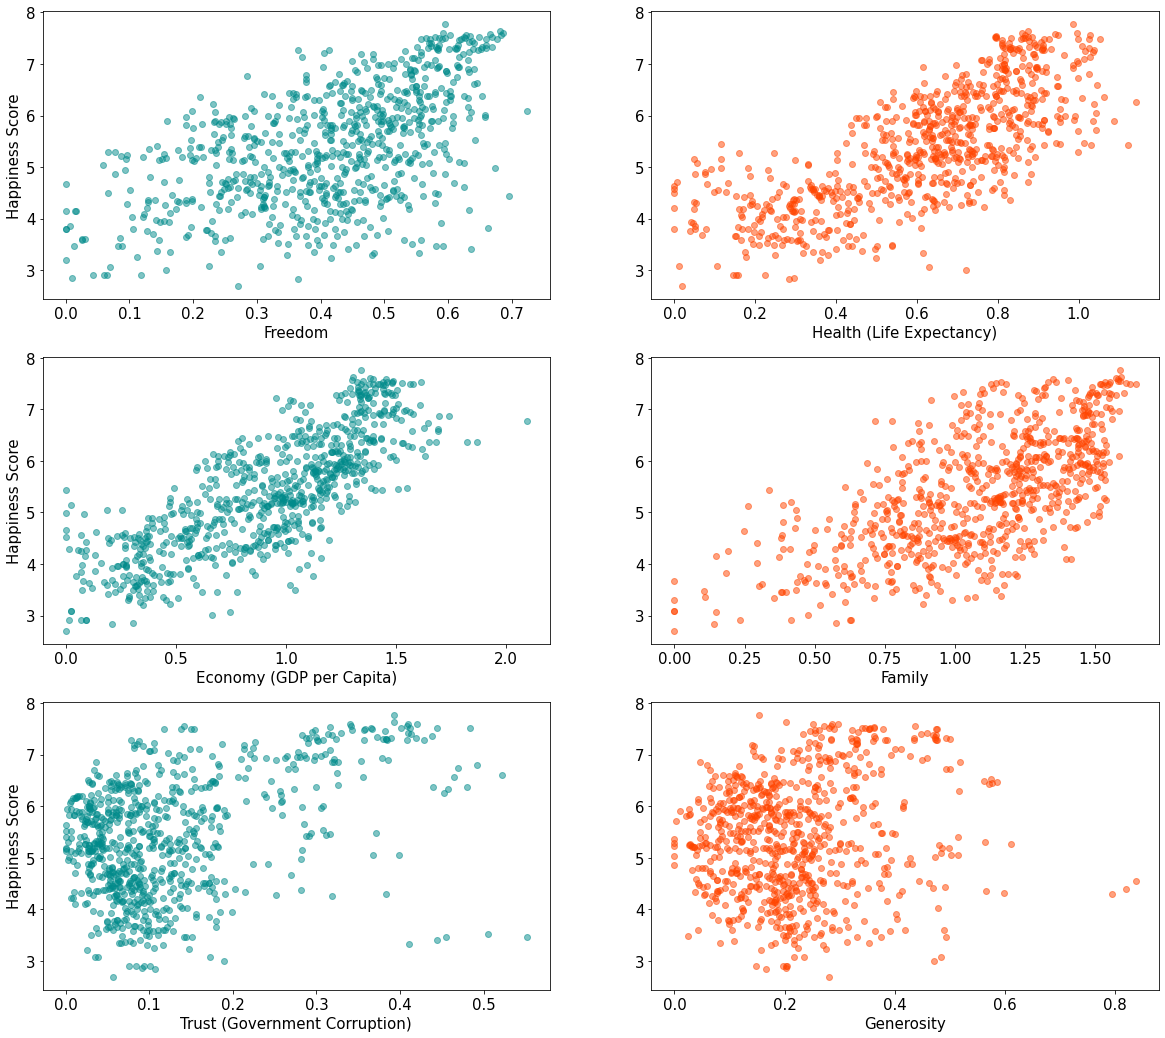

In [38]:
fig, axes = plt.subplots(3,2, figsize=(20,18))

axes[0,0].scatter(y=df1['Happiness Score'], x=df1['Freedom'], color = 'darkcyan', alpha=0.5)
axes[0,0].set_xlabel('Freedom', fontsize=15)
axes[0,0].set_ylabel('Happiness Score', fontsize=15)
axes[0,0].tick_params(axis='x', labelsize=15)
axes[0,0].tick_params(axis='y', labelsize=15)

axes[0,1].scatter(y=df1['Happiness Score'], x=df1['Health (Life Expectancy)'], color='orangered', alpha=0.5)
axes[0,1].set_xlabel('Health (Life Expectancy)', fontsize=15)
axes[0,1].tick_params(axis='x', labelsize=15)
axes[0,1].tick_params(axis='y', labelsize=15)

axes[1,0].scatter(y=df1['Happiness Score'], x=df1['Economy (GDP per Capita)'],color = 'darkcyan', alpha=0.5)
axes[1,0].set_xlabel('Economy (GDP per Capita)', fontsize=15)
axes[1,0].set_ylabel('Happiness Score', fontsize=15)
axes[1,0].tick_params(axis='x', labelsize=15)
axes[1,0].tick_params(axis='y', labelsize=15)

axes[1,1].scatter(y=df1['Happiness Score'], x=df1['Family'],color='orangered', alpha=0.5)
axes[1,1].set_xlabel('Family', fontsize=15)
axes[1,1].tick_params(axis='x', labelsize=15)
axes[1,1].tick_params(axis='y', labelsize=15)

axes[2,0].scatter(y=df1['Happiness Score'], x=df1['Trust (Government Corruption)'], color = 'darkcyan', alpha=0.5)
axes[2,0].set_xlabel('Trust (Government Corruption)', fontsize=15)
axes[2,0].set_ylabel('Happiness Score', fontsize=15)
axes[2,0].tick_params(axis='x', labelsize=15)
axes[2,0].tick_params(axis='y', labelsize=15)

axes[2,1].scatter(y=df1['Happiness Score'], x=df1['Generosity'],color = 'orangered', alpha=0.5)
axes[2,1].set_xlabel('Generosity', fontsize=15)
axes[2,1].tick_params(axis='x', labelsize=15)
axes[2,1].tick_params(axis='y', labelsize=15)

plt.show()

In [39]:
df2 = df1.copy()
df2.drop(['Year','Country', 'Region','Happiness Rank','Generosity',
          'Trust (Government Corruption)'], axis=1, inplace=True)

In [40]:
df2.corr()

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom
Happiness Score,1.000000,0.789284,0.648799,0.742456,0.551258
Economy (GDP per Capita),0.789284,1.000000,0.585966,0.784338,0.340511
Family,0.648799,0.585966,1.000000,0.572650,0.420361
Health (Life Expectancy),0.742456,0.784338,0.572650,1.000000,0.340745
Freedom,0.551258,0.340511,0.420361,0.340745,1.000000


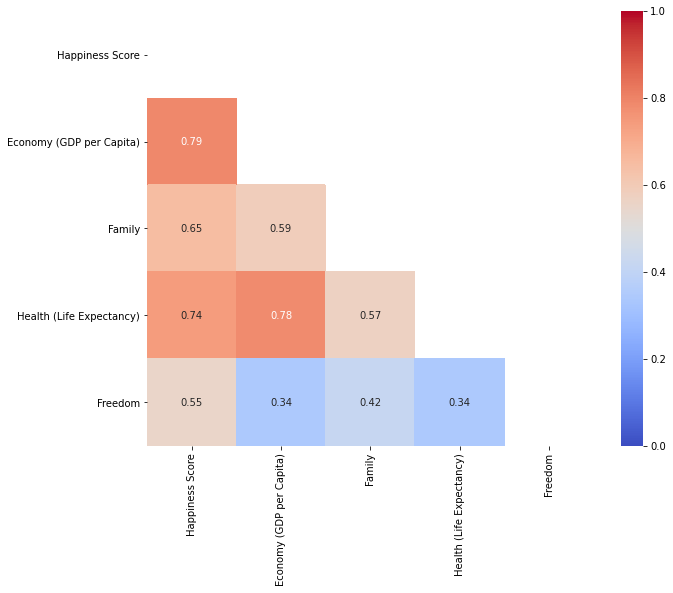

In [41]:
plt.figure(figsize=(10,8))
mask = np.triu(df2.corr())
sns.heatmap(df2.corr(), annot=True, cmap = 'coolwarm', mask = mask, vmin=0, vmax=1)
plt.show()

In [42]:
ss1 = df1.copy()
ssudan = ss1[ss1['Country']=='South Sudan']

In [43]:
southsud = ssudan.drop(['Year','Country', 'Region','Happiness Rank','Generosity',
          'Trust (Government Corruption)'], axis=1)

In [44]:
southsud

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom
142,3.832,0.393940,0.185190,0.157810,0.196620
146,3.591,0.397249,0.601323,0.163486,0.147062
153,3.254,0.337000,0.608000,0.177000,0.112000
155,2.853,0.306000,0.575000,0.295000,0.010000


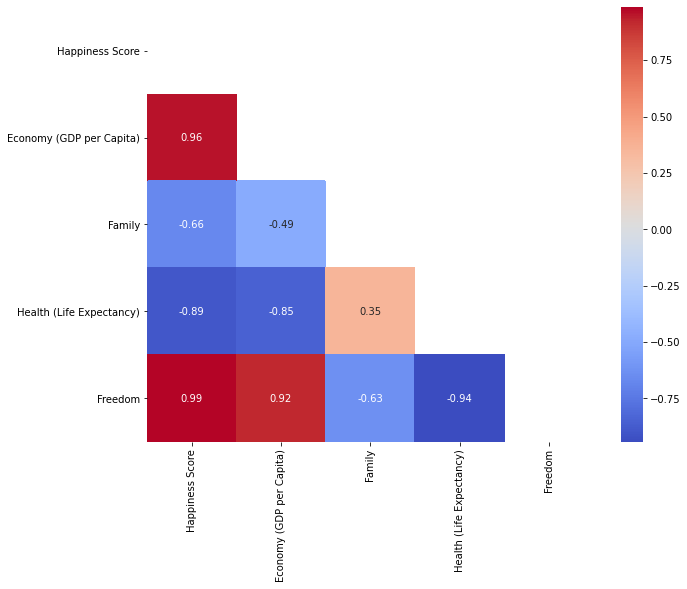

In [45]:
plt.figure(figsize=(10,8))
mask = np.triu(southsud.corr())
sns.heatmap(southsud.corr(), annot=True, cmap = 'coolwarm', mask = mask)
plt.show()

In [46]:
fin = df1.copy()

In [47]:
finland = fin.loc[fin['Country']=='Finland']
finland

,Year,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
5,2015,Finland,Western Europe,6,7.406,1.290250,1.318260,0.889110,0.641690,0.413720,0.233510
4,2016,Finland,Western Europe,5,7.413,1.405980,1.134640,0.810910,0.571040,0.410040,0.254920
4,2017,Finland,Western Europe,5,7.469,1.443572,1.540247,0.809158,0.617951,0.382612,0.245483
0,2018,Finland,Western Europe,1,7.632,1.305000,1.592000,0.874000,0.681000,0.393000,0.202000
0,2019,Finland,Western Europe,1,7.769,1.340000,1.587000,0.986000,0.596000,0.393000,0.153000


In [48]:
finn =finland.drop(['Year','Country', 'Region','Happiness Rank','Generosity',
          'Trust (Government Corruption)'], axis=1)

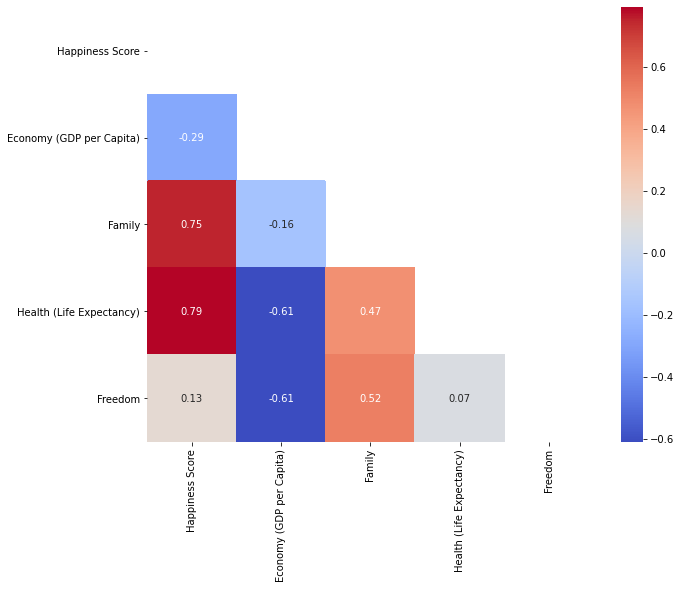

In [49]:
plt.figure(figsize=(10,8))
mask = np.triu(finn.corr())
sns.heatmap(finn.corr(), annot=True, cmap = 'coolwarm', mask = mask)
plt.show()